In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import sympy as sy
from sympy import *

PERCISION = 20

In [2]:
def forward(function , h , x0):
    f_ah = function.subs(x,x0+h).evalf(PERCISION)
    f_a = function.subs(x,x0).evalf(PERCISION)
    return np.divide(np.subtract(f_ah,f_a),h)
def backward(function , h,x0):
    f_ah = function.subs(x,x0-h).evalf(PERCISION)
    f_a = function.subs(x,x0).evalf(PERCISION)
    return np.divide(np.subtract(f_a , f_ah),h)
def central(function , h , x0):
    f_aph = function.subs(x,x0+h).evalf(PERCISION)
    f_ash = function.subs(x,x0-h).evalf(PERCISION)
    return np.divide(np.subtract(f_aph , f_ash),np.multiply(2,h))
def diff_(function ,x0):
    derivate_function = diff(function)
    return derivate_function.subs(x,x0).evalf(PERCISION)

In [3]:
x = symbols("x")
function = sin(3*x)

In [4]:
h = [1,0.5,0.25,0.125,0.0625]
forward_res = []
backward_res = []
central_res = []
diff_res = []

for i in h:
    forward_res.append(forward(function=function , h = i , x0 = 2))
    backward_res.append(backward(function=function , h = i , x0 = 2))
    central_res.append(central(function=function , h = i , x0 = 2))
    diff_res.append(diff_(function=function  , x0 = 2))

In [59]:
def ratio(results : list)->list:
    ratio = []
    for i in range(len(results)-1):
        ratio.append(np.divide(results[i],results[i+1]))
    ratio.append(0)    
    return ratio     

In [60]:
forward_ratio = ratio(forward_res)
backward_ratio = ratio(backward_res)
central_ratio = ratio(central_res)


In [61]:
results = pd.DataFrame()
results['forward'] = forward_res
results['backward'] = backward_res
results['central'] = central_res
results['answer'] = diff_res

results['forward_ratio'] = forward_ratio
results['backward_ratio'] = backward_ratio
results['central_ratio'] = central_ratio

results.index = h

In [62]:
results['backwardVsAnswer'] = abs(results['answer'] -results['forward'])
results['forwardVsAnswer'] = abs(results['answer'] -results['backward'])
results['centralVsAnswer'] = abs(results['answer'] -results['central'])

In [63]:
results = results.astype(float)

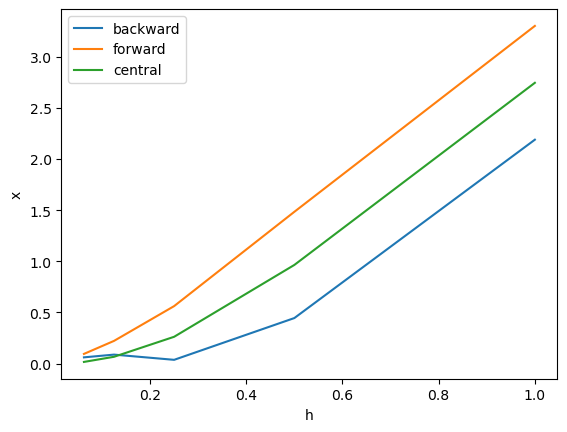

In [64]:
plt.plot(results.backwardVsAnswer.astype(float),label ='backward')
plt.plot(results.forwardVsAnswer.astype(float),label ='forward')
plt.plot(results.centralVsAnswer.astype(float),label ='central')
plt.xlabel('h')
plt.ylabel('x')
plt.legend()

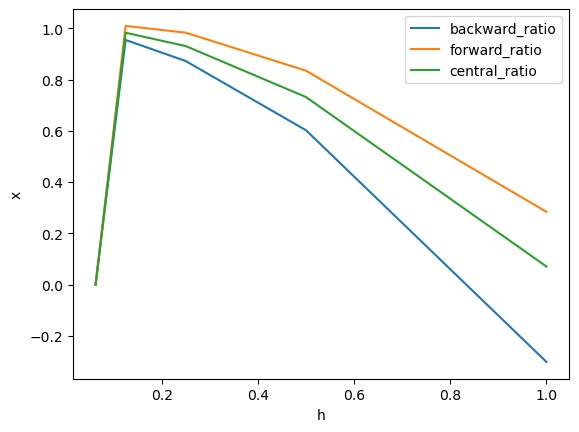

In [66]:
plt.plot(results.backward_ratio.astype(float)[1:],label ='backward_ratio')
plt.plot(results.forward_ratio.astype(float)[1:],label ='forward_ratio')
plt.plot(results.central_ratio.astype(float)[1:],label ='central_ratio')
plt.xlabel('h')
plt.ylabel('x')
plt.legend()

In [78]:
def second_diff_estimator(function , h , x0):
    f_aph = function.subs(x,x0+h).evalf(PERCISION)
    f_ash = function.subs(x,x0-h).evalf(PERCISION)
    f_a2 =  np.multiply(2,function.subs(x,x0).evalf(PERCISION))
    return np.divide(np.subtract(np.add(f_aph,f_ash),f_a2),np.power(h,2))
def diff_second(function ,x0):
    derivate_function = diff(diff(function))
    return derivate_function.subs(x,x0).evalf(PERCISION)    

In [79]:
x = symbols("x")
function = sin(3*x)

In [80]:
h = [1,0.5,0.25,0.125,0.0625]
second_diff_estimator_res = []
diff_second_res = []

for i in h:
    second_diff_estimator_res.append(second_diff_estimator(function=function,h=i,x0=2))
    diff_second_res.append(diff_second(function=function,x0=2))


In [83]:
second_diff_estimator_ratio = ratio(second_diff_estimator_res)


In [86]:
results = pd.DataFrame()
results['second_diff'] = second_diff_estimator_res
results['answer'] = diff_second_res

results['second_diff_estimatorVsAnswer'] = abs(results['second_diff'] -results['answer'])

results['second_diff_estimator_ratio'] = second_diff_estimator_ratio

results.index = h

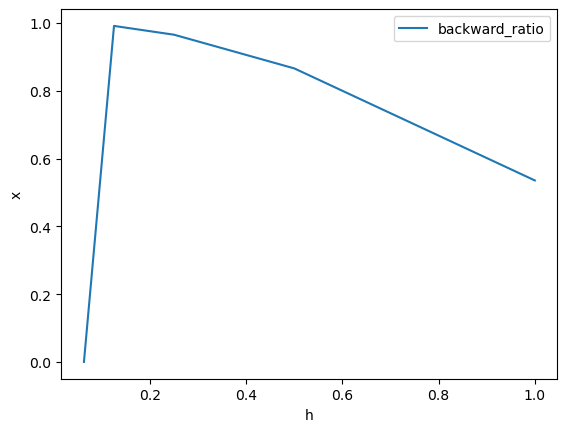

In [85]:
plt.plot(results.second_diff_estimator_ratio.astype(float)[1:],label ='second_diff_ratio')
plt.xlabel('h')
plt.ylabel('x')
plt.legend()

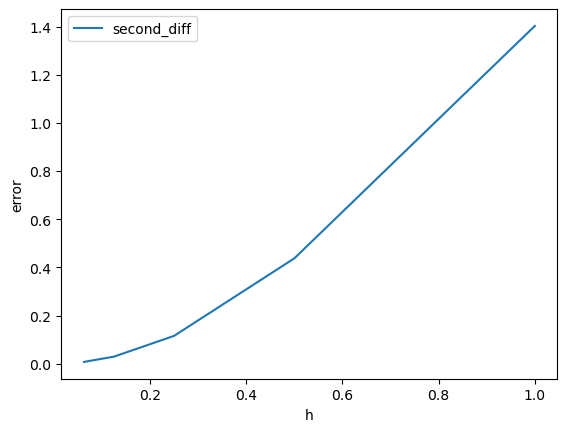

In [89]:
plt.plot(results.second_diff_estimatorVsAnswer.astype(float)[1:],label ='second_diff')
plt.xlabel('h')
plt.ylabel('error')
plt.legend()